In [1]:
print("Hello, World!")

Hello, World!


creating a simple rules based expert system

In [ ]:
from experta import *

class Diagnose(KnowledgeEngine):
    @Rule(Fact(symptoms='fever'), Fact(symptoms='cough'), Fact(symptoms='body_aches'))
    def flu(self):
        print("You may have the flu")

    @Rule(Fact(symptoms='sneezing'), Fact(symptoms='runny_nose'))
    def cold(self):
        print("You may have a common cold")

    @Rule(NOT(Fact(symptoms='fever')), NOT(Fact(symptoms=W())), salience=1)
    def healthy(self):
        print("No diagnosis, You are healthy")

#creating a knowledge engine object called engine
engine = Diagnose()
#resetting the engine
engine.reset()
#here the user is prompted to enter their symptoms after which they are declared as facts in the engine instance
print("Enter your symptoms one by one")
while True:
    symptom = input("Enter symptom ")
    if symptom == "done":
        break
    engine.declare(Fact(symptoms=symptom))
# running the engine

engine.run()

creating a knowledge base

 this is to demonstrate knowledge representation and ontologies

In [ ]:
class KnowledgeBase:
    def __init__(self):
        self.diseases = {
            "Common Cold": {"symptoms": ["cough", "sneezing", "sore throat"], "treatment": "rest and hydration"},
            "Flu": {"symptoms": ["fever", "fatigue", "body aches"], "treatment": "antiviral medication"},
            "Pneumonia": {"symptoms": ["chest pain", "cough", "fever"], "treatment": "antibiotics"},
            "Tuberculosis": {"symptoms": ["cough with blood", "fatigue", "weight loss"], "treatment": "antibiotics"},
            "Allergies": {"symptoms": ["sneezing", "itchy eyes", "rash"], "treatment": "antihistamines"}
        }

        self.relationships = {
            "Common Cold": ["Flu", "Allergies"],
            "Flu": ["Common Cold", "Pneumonia"],
            "Pneumonia": ["Flu"],
            "Tuberculosis": [],
            "Allergies": ["Common Cold"],
            "cough": ["Common Cold", "Flu", "Pneumonia", "Tuberculosis"],
            "sneezing": ["Common Cold", "Flu", "Allergies"],
            "fever": ["Flu", "Pneumonia"]
        }

    def diagnose(self, symptoms):
        possible_diseases = {}
        for symptom in symptoms:
            for disease in self.relationships.get(symptom, []):
                possible_diseases[disease] = possible_diseases.get(disease, 0) + 1

        # Sort diseases by the number of matching symptoms (most relevant first)
        sorted_diseases = sorted(possible_diseases.items(), key=lambda x: x[1], reverse=True)

        return [disease for disease, _ in sorted_diseases]

# Interactive mode
kb = KnowledgeBase()
print("Welcome to the Medical Diagnosis Knowledge-Based System")
print("Possible symptoms:", ", ".join(kb.relationships.keys()))
print("\nEnter symptoms (comma separated):")
user_input = input(">").lower().split(",")

symptoms = [symptom.strip() for symptom in user_input]
diagnoses = kb.diagnose(symptoms)

if diagnoses:
    print("Possible diagnoses:")
    for disease in diagnoses:
        print(f"- {disease}: {kb.diseases[disease]['treatment']}")
else:
    print("No diagnoses found. Please consult a doctor.")

    knowlede based matchmaking system
This will match profiles based on their waited compatibility scores across multiple attributes
the kbs maintains profiles and user specific rules to deter mine matches

In [2]:
class knowledgeBase:
    """"this will store user profiles with their unique identifiers 
    Acts as the knowledge repository for the matchmaking system"""
    def __init__(self):
        self.profiles = {} #{profile_id: profile_data}
        self.next_id = 1 #auto id counter
    
    def add_profile (self, profile_data):
        """Adds a new profile to the knowledge base with automatic assignment of an ID
        param profile_data: a dictionary of profile attributes
        returns: the profile ID"""
        profile_id = self.next_id
        self.next_id += 1
        return profile_id
    
    def remove_profile(self, profile_id):
        #this removes profiles from the knowledge base
        if profile_id in self.profiles:
            del self.profiles[profile_id]
    
    def get_profile(self, profiel_id):
        #retrieves a profile by its ID
        return self.profiles.get(profiel_id)
    
    def get_all_profiles(self):
        return list(self.profiles.values())
    

class Matchmaker:
    """
    this implemets the matchmaking logic using compatibility rules and weights 
    leveraging the KB to find the optimal matches for a given profile
    """
    def __init__(self, knowledge_base, weights = None, max_age_diff = 20):
        """
        :param knowlwdge_base: a knowledge_base instance
        param weights: Dictionary conataining attribute weights fora matchmaking (sum to 1)
        param max_age_diff: Maximum age diff allowd between profiles
        """
        self.knowledge_base = knowledgeBase()
        self.weights = weights or {'age': 0.3, 'interest':0.5, 'location': 0.2}#default weights
        self.max_age_diff = max_age_diff #default max age diff

    def calculate_compatibility(self, profile_a, profile_b):
        """"1
        this calculates the compatibilty score between two profiles
        it implements domain specidic matching rules
        -Age: normalized inverse age gap
        -Interest: Jaccard similarity of interests
        -Location: Exact match check

        """
        #age compatibitlty(normalized inverse difference)
        age_diff = abs(profile_a['age'] - profile_b('age'))#absolute age difference
        age_score = max(0, 1-(age_diff/self.max_age_diff))#normalized inverse age difference

        #interest comaptibility (Jaccard similarity)
        interest_a = set(profile_a['interests'])
        interest_b = set(profile_b['interests'])
        intersection = len(interest_a & interest_b)#common interest 
        union = len(interest_a | interest_b)#all interests
        jaccard_score = (intersection / union) * self.weights['interest']#jaccard similarity

        #location comaptibitlty
        location_score = (self.weights['location'] if profile_a['location'] == profile_b['location'] else 0)
        
        return age_score + jaccard_score + location_score
    
    def find_matches(self, user_id, top_n = 5):
        """finds the top N  matches for a given user profile based on caompatiblity scores
        param user_id: the ID of the user to find matches for
        param limit: the maximum number of matches to return
        returns: a list of the best matching profiles"""
        target_profile = self.knowledge_base.get_profile(user_id)
        if not target_profile:
            return []
        #calculate compatibility scores
        matches = {}
        for profile in self.knowledge_base.get_all_profiles():
            if profile['id'] != user_id:
                matches[profile['id']] = self.calculate_compatibility(target_profile, profile)
        
        #sort the profiles by their scores
        sorted_profiles = sorted(matches.items(), key = lambda x: x[1], reverse = True)
        return sorted_profiles[:top_n]

if __name__ == '__main__':
    #initialize the knowledgebase
    kb = knowledgeBase()

    #populate with sample profiles
    profiles = [
        {'age': 25, 'interests': ['hiking', 'biking'], 'location': 'NY'},
        {'age': 30, 'interests': ['biking', 'reading'], 'location': 'NY'},
        {'age': 28, 'interests': ['biking', 'movies'], 'location': 'CA'},
        {'age': 27, 'interests': ['hiking', 'movies'], 'location': 'CA'},
        {'age': 26, 'interests': ['reading', 'movies'], 'location': 'NY'}
    ]
    for p in profiles:
        kb.add_profile(p)

    #initialize the matchmaker
    matchmaker = Matchmaker(
        knowledge_base  = kb,
        weights = {'age': 0.3, 'interest': 0.5, 'location': 0.2},
        max_age_diff = 25
    )


    #find matches for the firs profile
    print("Top matches for profile 1: ")
    for match in matchmaker.find_matches(1, top_n=3):
        print(f"profile{match[0]} with compatibilty score: {match[1]}")                

    


Top matches for profile 1: 


demostrating fuzzy logic

Fan speed: 61.85%


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


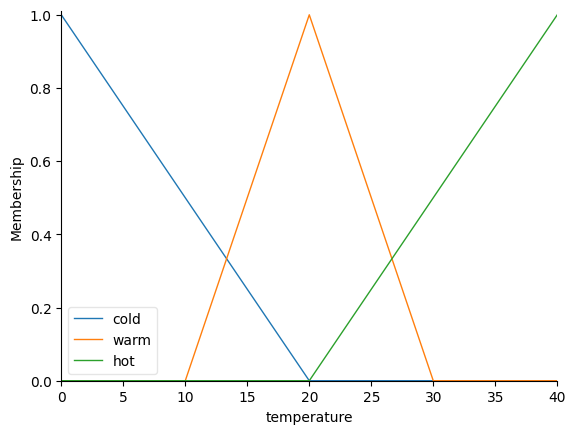

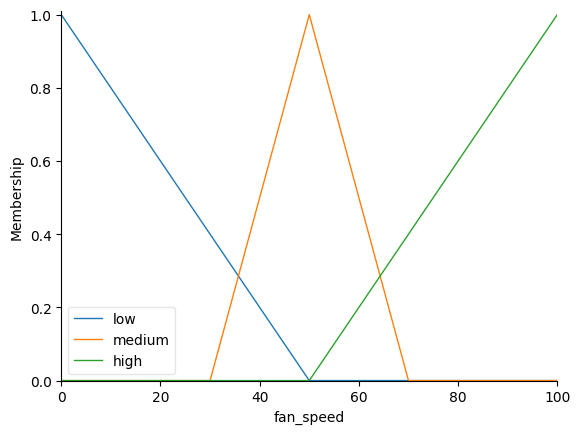

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Step 2: Define membership functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 40, 40])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Step 3: Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

# Step 4: Create control system
fan_control = ctrl.ControlSystem([rule1, rule2, rule3])
fan = ctrl.ControlSystemSimulation(fan_control)

# Step 5: Input value
fan.input['temperature'] = 25  # Example: 25 degrees

# Step 6: Compute the result
fan.compute()

# Step 7: Show result
print(f"Fan speed: {fan.output['fan_speed']:.2f}%")

# Step 8: Visualize the results
temperature.view()
fan_speed.view()

# Fuzzy Sprinkler System

Here is a simple fuzzy logic system meant for deciding how much water to sprinkle.

## System Overview

The system will have 2 antecedents:
1. Ambient temperature
2. Soil moisture level

## Rules

1. If the soil is dry and the weather is "hot" → Sprinkle "more" water
2. If the soil is moist and the weather is "cool" → Sprinkle "less" water
3. If the soil is "wet" → "Don't sprinkle any" water

## Input Variables

### Soil Moisture:
- Dry
- Moist
- Wet

### Weather Temperature:
- Cold
- Warm
- Hot

## Output Variable

### Water Sprinkling Level:
- Low
- Medium
- High


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 58, 1), "temperature")
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), "soil_moisture")
time_of_day = ctrl.Antecedent(np.arange(0, 24.5, 0.5), "time_of_day")
sprinkler_activity = ctrl.Consequent(np.arange(0, 101, 1), "sprinkler_activity")


# Temperature membership functions (with overlap)
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 25, 35])  # Extended to 35°C
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 58, 58])   # Starts at 30°C

# Soil moisture membership functions (with overlap)
soil_moisture['dry'] = fuzz.trimf(soil_moisture.universe, [0, 0, 20])
soil_moisture['ideal'] = fuzz.trimf(soil_moisture.universe, [15, 40, 45])
soil_moisture['wet'] = fuzz.trimf(soil_moisture.universe, [40, 100, 100])

# Sprinkler activity membership functions
sprinkler_activity['low'] = fuzz.trimf(sprinkler_activity.universe, [0, 0, 50])
sprinkler_activity['moderate'] = fuzz.trimf(sprinkler_activity.universe, [30, 50, 70])
sprinkler_activity['high'] = fuzz.trimf(sprinkler_activity.universe, [60, 100, 100])

# time of the day membership function
time_of_day['night'] = fuzz.trimf(time_of_day.universe, [0, 0, 6] & [18.5, 24, 24])
time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [5.5, 8.5, 12])
time_of_day['mid_day'] = fuzz.trimf(time_of_day.universe, [10.5, 13.5, 15.5])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [15, 17, 19] )

# Rules (expanded coverage)
rule1 = ctrl.Rule(soil_moisture['dry'] & temperature['hot'], sprinkler_activity['high'])
rule2 = ctrl.Rule(soil_moisture['ideal'] & temperature['warm'], sprinkler_activity['moderate'])
rule3 = ctrl.Rule(soil_moisture['wet'], sprinkler_activity['low'])
rule5 = ctrl.Rule(soil_moisture['ideal'] & temperature['hot'] & time_of_day['mid_day'], sprinkler_activity['high'])

sprinkler_control = ctrl.ControlSystem([rule1, rule2, rule3, rule5])
simulator = ctrl.ControlSystemSimulation(sprinkler_control)

# Simulate
simulator.input['temperature'] = 35
simulator.input['soil_moisture'] = 30
simulator.input['time_of_day'] = "mid_day"

simulator.compute()
print(f"Sprinkler activity is at... {simulator.output['sprinkler_activity']:.2f}%")

TypeError: Antecedent.__init__() missing 1 required positional argument: 'label'